# 卷积神经网络（CNN）应用

<font size=4 face="宋体">采用 <font size=4 color=blue>**Pytorch**</font> 框架，必须配置Pytorch环境，环境配置文件见<font size=4 color=blue>“深度学习Pythorch cpu安装配置.pdf”</font></font>

## - 使用卷积神经网络对CIFAR-10数据集中的图像进行分类

<font size=4 color=blue>**CIFAR-10 数据集**</font> 
<p style="line-height: 1.25;"><font size=3 face="宋体">&nbsp;&nbsp;由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集. 一共包含 $10$ 个类别的 RGB 彩色图 片: </font> </p>  
<p style="line-height: 0.8;"><font size=3 face="黑体">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;飞机（airplane）  汽车（automobile）  鸟类（bird）  猫（cat）   鹿（deer）</font> </p> 
<p style="line-height: 0.8;"><font size=3 face="黑体">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  狗（dog）     蛙类（frog）      马（horse）  船（ship）  卡车（truck）</font> </p>   
<p style="line-height: 1.25;"><font size=3 face="宋体">图片尺寸为 $3\times32\times32$，也就是$3$通道(RGB)的 $32\times32$ 的图片，数据集中一共有 $50000$ 张训练图片和 $10000$ 张测试图片. </font> </p>

<font size=4 color=blue>  训练一个图片分类器, 分成如下步骤：</font>  
<p style="line-height: 0.8;">&nbsp;&nbsp;1. 使用torchvision加载和预处理数据集 </p> 
<p style="line-height: 0.8;">&nbsp;&nbsp;2. 定义卷积网络 </p>
<p style="line-height: 0.8;">&nbsp;&nbsp;3. 定义损失函数和优化器 </p>
<p style="line-height: 0.8;">&nbsp;&nbsp;4. 用训练数据训练模型 </p>  
<p style="line-height: 0.8;">&nbsp;&nbsp;5. 用测试数据测试模型 </p>

<font size=4 color=blue>- 导入相关的包</font>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision 
from torchvision import transforms,datasets
import torch 
from torch import nn,optim
import torch.nn.functional as F
from torch.utils import data

### 1.   使用torchvision加载和预处理数据集

<font size=4 color=blue>- 读取 CIFAR-10 数据集</font>

- 使用**torchvision.datasets**, 加载 CIFAR10 数据集
- 对数据进行转换，将其转换到范围[-1, 1]
- 使用数据加载器**DataLoader**，按批次(batch_size)对数据进行封装

In [2]:
# (1) 定义数据变换
transform = transforms.Compose([
    transforms.ToTensor(),                                    # 数据变换: 将数据转化为张量 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))    # 可选参数normalize: 根据预先确定的均值和标准差归一化张量值
    ])  

In [3]:
# (2)加载训练集和测试集
dataset_name = 'CIFAR10'
# 加载训练集
train_data = datasets.CIFAR10(
    root = 'dataset/CIFAR10',             # 文件存放路径（自定义）
    train = True,                         # 提取训练集   True
    transform = transform,                # 数据变换
    download = True)                      # 当找不到文件时自动下载     
# 加载测试集
test_data = datasets.CIFAR10(
    root = 'dataset/CIFAR10',             # 文件存放路径
    train = False,                        # 提取测试集  False
    transform = transform,                # 数据变换
    download = True)                      # 当找不到文件时自动下载 

Files already downloaded and verified
Files already downloaded and verified


- <font size=3 color=red> 注: </font>如果有下载问题，请先从 https://media.githubusercontent.com/media/fancyerii/fancyerii.github.io/master/assets/cifar-10-python.tar.gz 下载，然后解压

In [4]:
# (3) 用DataLoader对数据集进行封装
batch_size =  128  #   64  #   16  #  4  #    256  #    # 批次大小
# 训练集 - 数据批处理
train_loader = data.DataLoader(
    dataset = train_data,                    # 训练数据集                                       
    batch_size = batch_size,                 # 批次大小
    shuffle = True,                          # 重排数据集
    num_workers=0)                           # 使用几个进程读取数据
# 测试集 - 数据批处理
test_loader = data.DataLoader(
    dataset = test_data,                     # 测试数据集                                       
    batch_size = batch_size,                 # 批次大小
    shuffle = False,                         # 重排数据集
    num_workers=0)                           # 使用几个进程读取数据

In [5]:
# (4) 类别标签
# 根据类别编号获取类别标签
def get_cifar_labels(class_index):
    # class_index 类别编号
    label_names = ('plane','car',  'bird',  'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return [label_names[int(i)] for i in class_index]

<font size=4 color=blue>- 可视化 CIFAR-10 数据图像 </font>

torch.Size([16, 3, 32, 32])


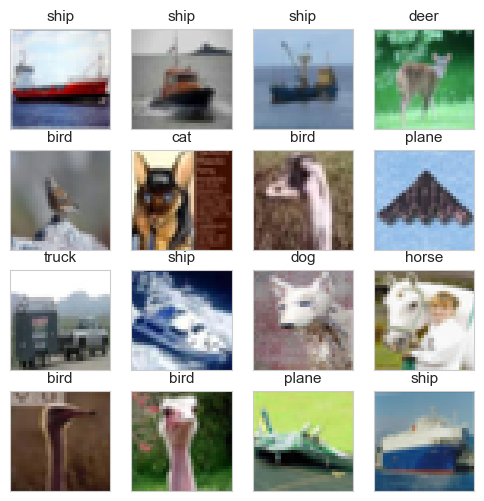

In [6]:
from nnc.plot_tool import show_images

# 可视化观察其中一个批次(batch_size)的样本Xt,及对应的标签Ct(类别编号)
for Xt,Ct in train_loader:
    break
titles = [label for label in get_cifar_labels(Ct)]   # 图片的title，即图片的类别标签
n = 16 # batch_size   #                                      # 显示的图片数目
print(Xt[:n].shape)                                  # 数据维度
num_rows,num_cols = int(np.sqrt(n)),int(np.sqrt(n))   # 输出图片排列的行列个数
show_images(Xt[:n].numpy().transpose(0,2,3,1),num_rows,num_cols,titles=titles[0:n],scale=1.5)

### 2. 定义卷积网络

- 定义具有如下结构的卷积网络:  
&nbsp;&nbsp; - &nbsp; 2个卷积块：  每个卷积块中的基本单元是1个卷积层、1个ReLU激活函数、1个最大汇聚层   
&nbsp;&nbsp; - &nbsp; 3个全连接层：分别有120、84和10个输出


In [7]:
# 定义卷积网络
class Model_Net_s(nn.Module):
    
    def __init__(self,in_channels=3,num_classes=10):        
        # in_channels: 输出数据的通道数目 (CIFAR-10数据集的彩色图像具有 RGB 3个通道)
        # num_classes: 输出的类别数目 (CIFAR-10数据集的类别数目=10)        
        super(Model_Net_s,self).__init__()        
        # 构造 CNN 需要用到的各个神经模块
        # 卷积层-1：输出通道数为 6，卷积核大小为 5×5
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5)  # 步长 stride=1，padding=0  默认
        # 汇聚层：汇聚窗口为2×2，步长为2， 最大汇聚 MaxPool
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 卷积层-2：输入通道数为 6，输出通道数为 16，卷积核大小为 5×5
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # 全连接层-1：输入神经元为16*5*5=400，输出神经元为120
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        # 全连接层-2：输入神经元为120，输出神经元为84
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        # 全连接层-3：输入神经元为84，输出神经元为类别数10
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)
    
    def forward(self, X):
        # 输入： X.shape=[N,input_size], N是样本数量   X -> 32*32*3
        # 第1个卷积块
        X = self.conv1(X)     # 卷积操作   X ->  28*28*6
        X = F.relu(X)         # ReLU 激活  X ->  28*28*6
        X = self.pool(X)      # 汇聚操作   X ->  14*14*6
        # 第2个卷积块
        X = self.pool(F.relu(self.conv2(X)))  #  X ->  10*10*16 -> 5*5*16
        # flatten 扁平化
        X = X.view(-1, 16 * 5 * 5)   # X -> 1*400
        # 第1个全连接层+ReLU
        X = F.relu(self.fc1(X))   # X -> 1*120
        # 第2个全连接层+ReLU
        X = F.relu(self.fc2(X))   # X -> 1*84
        # 第3个全连接层
        X = self.fc3(X)           # X -> 1*10
        return X
    

- 通过实例化⼀个Sequential块，并将需要的层（模块）连接在⼀起，可以得到定义网络更为简洁的代码。

In [6]:
# 定义卷积网络
class Model_Net(nn.Module):
    
    def __init__(self,in_channels=3,num_classes=10): 
        # in_channels: 输出数据的通道数目 (CIFAR-10数据集的彩色图像具有 RGB 3个通道)
        # num_classes: 输出的类别数目 (CIFAR-10数据集的类别数目=10)        
        super(Model_Net,self).__init__()        
        # 构造 CNN 需要用到的各个神经模块
        # 卷积层-1：输出通道数为 6，卷积核大小为 5×5
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5)  # 步长 stride=1，padding=0  默认
        # 汇聚层：汇聚窗口为2×2，步长为2， 最大汇聚 MaxPool
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 卷积层-2：输入通道数为 6，输出通道数为 16，卷积核大小为 5×5
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # 全连接层-1：输入神经元为16*5*5=400，输出神经元为120
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        # 全连接层-2：输入神经元为120，输出神经元为84
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        # 全连接层-3：输入神经元为84，输出神经元为类别数10
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)
        
        self.net = nn.Sequential(
            self.conv1, nn.ReLU(),
            self.pool,
            self.conv2, nn.ReLU(),
            self.pool,
            nn.Flatten(),             # flatten 扁平化  输入层将数据拉平[B,C,H,W] -> [B,CxHxW]  
            self.fc1, nn.ReLU(),
            self.fc2, nn.ReLU(),
            self.fc3)
        
        self.net_name = None   # 定义网络名称
    
    def forward(self, X):
        # 输入： X.shape=[N,input_size], N是样本数量   X -> 32*32*3        
        return self.net(X)

- 构建卷积网络模型:  

In [7]:
# 模型构建
image_size = 32    # 图片的尺寸为 32*32
in_channels = 3    # 图片的通道数目 3
n_classes = 10     # 图片类别数目   

# 实例化模型
model = Model_Net(in_channels=in_channels,num_classes=n_classes)


-  将一个$32\times32\times3$的图片输入到模型中，通过打印每⼀层输出的形状，可以检查模型的设置

In [10]:
x = Xt[:1]
print('\nImage input shape: \t',x.shape)
for layer in model.net:
    x = layer(x)
    print(layer.__class__.__name__,'output shape: \t',x.shape)


Image input shape: 	 torch.Size([1, 3, 32, 32])
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
ReLU output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
ReLU output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


&nbsp;&nbsp;&nbsp; - &nbsp; 第1个和第2个卷积层在使用5×5卷积核进行卷积操作后，高度和宽度都减少了4个像素.  
&nbsp;&nbsp;&nbsp; - &nbsp; 随着层叠的上升，通道的数量从输⼊时的3个，增加到第1个卷积层之后的6个，再到第2个卷积层之后的16个.  
&nbsp;&nbsp;&nbsp; - &nbsp; 每个汇聚层的⾼度和宽度都减半.  
&nbsp;&nbsp;&nbsp; - &nbsp; 每个全连接层减少维数，最终输出⼀个维数与结果分类数相匹配的输出.

### 3. 定义损失函数、优化器、评价函数

- 对多分类问题使用交叉熵损失函数  

In [8]:
# 多分类问题使用交叉熵损失函数
loss_func = nn.CrossEntropyLoss()

- 优化器Optimizer  
&nbsp;&nbsp;&nbsp; - &nbsp; 小批量随机梯度下降 SGD： &nbsp; optimizer = optim.SGD(model.parameters(), lr=learning_rate)  
&nbsp;&nbsp;&nbsp; - &nbsp; 带冲量的SGD：optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum= momentum)  
&nbsp;&nbsp;&nbsp; - &nbsp; Adam优化算法：optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)  
&nbsp;&nbsp;&nbsp; - &nbsp; ......

In [9]:
# 优化器 Optimizer：
# 优化算法：⼩批量随机梯度下降 SGD   optimizer = optim.SGD(model.parameters(), lr=0.01)
# 优化算法：Adam优化算法  optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=weight_decay)
# 优化算法：带冲量的SGD
# 学习率 lr = 0.001
# 冲量参数 momentum = 0.9
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


- 评价函数  
&nbsp;&nbsp;&nbsp; - &nbsp; 使用PyTorch指标计算库TorchMetrics  
&nbsp;&nbsp;&nbsp; - &nbsp; 分类评价指标：准确率(Accuracy)、精度(Precision)、召回率(Recall)、F1分数(F-1 Score)、混淆矩阵(Confusion Matrix)

In [10]:
import torchmetrics.classification as metrics
metric = metrics.Accuracy(task='multiclass',num_classes=n_classes)            # 准确率 accuracy 
#metric =  metrics.MulticlassAccuracy(num_classes=n_classes,average='macro')   # 准确率 accuracy 
# metric =  metrics.MulticlassAccuracy(num_classes=n_classes,average='macri')  
print('metric: ',metric)

metric:  MulticlassAccuracy()


### 4. 模型训练

- 定义Runner类对网络的学习模型进行封装

In [11]:
class Runner(object):
    
    def __init__(self,model,optimizer,loss_func,metric,device=None):
        # 网络模型
        self.model = model
        # 优化器
        self.optimizer = optimizer
        # 损失函数
        self.loss_func = loss_func
        # 评价函数
        self.metric = metric
        
        # 记录训练过程中的损失函数变化情况
        self.train_step_loss = []      # 一个step记录一次loss        
        self.train_epoch_loss = []     # 一个epoch记录一次loss
        
        # 记录训练过程中的评估指标变化情况
        self.train_loss = []              # 训练集  每次评价记录一次loss
        self.test_loss = []               # 测试集  每次评价记录一次loss
        self.train_scores = []            # 训练集  每次评价记录一次score
        self.test_scores = []             # 测试集  每次评价记录一次score              
        
        # 记录全局最优评价指标
        self.best_score = 0 
        
        # 计算设置
        if device is None:
            self.device = torch.device('cpu')   # 默认为有cpu上训练
        else:
            self.device = device    # torch.device('cuda')   
    
    # 模型训练
    def train(self,train_loader,test_loader=None, **kwargs):  
              
        # 传入训练轮数，如果没有传入值则默认为0
        num_epochs = kwargs.get("num_epochs", 0)    
        # 训练总的步数
        num_training_steps = num_epochs * len(train_loader)
               
        # 传入log打印频率，如果没有传入值则默认为100 (按step打印)
        log_steps = kwargs.get("log_steps", 100)         
        # 评价频率
        eval_steps = kwargs.get("eval_steps",0)   
        # 模型保存路径
        model_dir = kwargs.get('model_dir',None)         
        # 模型名称
        model_name = kwargs.get('model_name',"best_model.pt")  
               
        # 记录全局最优指标
        # best_score = 0     
        
        if eval_steps:
            if self.metric is None:
                raise RuntimeError('Error: Metric can not be None!')
            if test_loader is None:
                raise RuntimeError('Error: test_loader can not be None!')
        
        # 运行的step数目
        global_step = 0
        
        device = kwargs.get('device',self.device)  
        self.model.to(device)
        
        # 在整个训练数据集（train_loader）上进行num_epochs轮训练
        for epoch in range(num_epochs):             
            # 将模型切换为训练模式
            self.model.train()
            
            # 用于统计训练集的损失
            total_loss = 0 
            for step, data in enumerate(train_loader):
                # 训练的批量数据
                X, y = data  
                if isinstance(X,tuple):
                    X = tuple([x.to(device) for x in X])
                elif isinstance(X,list):
                    X = [x.to(device) for x in X]
                else:
                    X = X.to(device)
                y = y.to(device)
                
                # forward + backward + optimize
                # 获取模型预测
                pred_y = self.model(X)
                # 计算交叉熵损失
                loss = self.loss_func(pred_y,y)
                total_loss += loss  
                # 梯度反向传播，计算每个参数的梯度值
                loss.backward() 
                # 更新模型参数 
                self.optimizer.step()
                
                # 梯度归零
                self.optimizer.zero_grad()
                              
                # 训练过程中，对每个step的训练loss进行保存
                self.train_step_loss.append((global_step,loss.item()))
                
                # 判断是否需要打印
                # 打印 training loss  每100步step
                if log_steps and global_step%log_steps==0:
                    print(f"\n[Train] epoch: {epoch}/{num_epochs}, step: {global_step}/{num_training_steps}, loss: {loss.item():.5f}")
            
                # 判断是否需要评价
                if eval_steps>0 and global_step>0 and (global_step%eval_steps == 0 or global_step==(num_training_steps-1)):
                    # 对测试集进行评价
                    test_score, test_loss = self.evaluate(test_loader)
                    self.test_scores.append(test_score)
                    self.test_loss.append((global_step, test_loss)) 
                    # 对训练集进行评价
                    train_score, train_loss = self.evaluate(train_loader)
                    self.train_scores.append(train_score)
                    self.train_loss.append((global_step, train_loss))
                    print('\n---- evaluate ----')
                    print(f"[Train] epoch: {epoch}/{num_epochs},step: {global_step}/{num_training_steps}, loss: {train_loss:.5f}, score: {train_score:.5f}")
                    print(f"[Test ] epoch: {epoch}/{num_epochs},step: {global_step}/{num_training_steps}, loss: {test_loss:.5f},  score: {test_score:.5f}")
                
                    # 将模型切换为训练模式
                    self.model.train()
                
                global_step += 1 
                
            # 当前epoch 训练loss累计值 
            trn_loss = (total_loss / len(train_loader)).item()
            # epoch粒度的训练loss保存
            self.train_epoch_loss.append(trn_loss)
        
        self.save_model(model_dir,model_name)        
        print("[Train] Training done!")
    
    # 模型评价
    @torch.no_grad()
    def evaluate(self,data_loader,**kwargs):     
        assert self.metric is not None
        
        # 计算装置设置/切换
        device = kwargs.get('device',None)    
        if not device:
            device = next(iter(self.model.net.parameters())).device
        
        # 将模型设置为评估模式
        self.model.eval()
        
        # 用于统计累积损失
        total_loss = 0
        
        # 重置评价
        self.metric.reset()
        self.metric.to(device)
        
        # 遍历验证集每个批次    
        for batch_id, data in enumerate(data_loader):
            X, y = data   
            if isinstance(X,tuple): 
                X = tuple([x.to(device) for x in X])
            elif isinstance(X,list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 计算模型输出
            pred_y = self.model(X)
            # 计算损失函数
            loss_id = self.loss_func(pred_y,y).item()
            # 累积损失
            total_loss += loss_id            
            # 累积评价
            self.metric.update(pred_y, y)
                
        # 计算平均损失    
        loss = (total_loss/len(data_loader))
        # 计算评价分数
        score = self.metric.compute().item()                    
        return score,loss
    
    # 模型预测
    @torch.no_grad()
    def predict(self,X,**kwargs):
        device = kwargs.get('device',None)  
        if not device:
            device = next(iter(self.model.net.parameters())).device
        # 将模型设置为评估模式
        self.model.eval()
        return self.model(X.to(device)) # .squeeze()
    
    # 保存模型
    def save_model(self,model_dir,model_name=None):
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
        if model_name is None:
            model_path = os.path.join(model_dir,'model_params.pt') 
        else:
            model_path = os.path.join(model_dir,model_name) 
        # 保存模型
        torch.save(self.model.state_dict(), model_path)
    
    # 加载模型
    def load_model(self,model_dir,model_name=None):
        if model_name is None:
            model_path = os.path.join(model_dir,'model_params.pt')
        else:
            model_path = os.path.join(model_dir,model_name) 
        self.model.load_state_dict(torch.load(model_path))  

def try_gpu(i=0):
    """Return gpu(i) if exists, otherwise return cpu().
    Defined in: numref:`sec_use_gpu`"""
    if torch.cuda.device_count() >= i + 1:
        print('device: cuda-{}'.format(i))
        return torch.device(f'cuda:{i}')
    print('device: cpu')
    return torch.device('cpu')    

# torch.cuda.device_count() 查询可⽤gpu的数量
                    

- 实例化Runner类, 并传入训练配置 

In [12]:
runner = Runner(model,optimizer,loss_func,metric ,try_gpu())   #  )   # 

device: cuda-0


- 模型训练

In [13]:
dataset_name = 'CIFAR10'   # 数据集名称
net_name = 'cnn_2'  # 网络名称
exam_name = 'ex_1'  # 实验名称
# 模型参数保存路径/名称
model_path = f'./Results/{dataset_name}/{net_name}/{exam_name}'
model_name = 'model_params.pt'

# 设置模型训练参数
num_epochs = 5     # 训练循环次数 (这里只迭代2个epoch，实际应该进行更多次训练 )
log_steps = 300  # 训练损失打印步长
eval_steps = 100  # 验证集评价步长
runner.train(train_loader,
             test_loader,
             num_epochs=num_epochs,
             log_steps=log_steps,
             eval_steps=eval_steps,
             model_dir=model_path,
             model_name=model_name)


[Train] epoch: 0/5, step: 0/1955, loss: 2.30079

---- evaluate ----
[Train] epoch: 0/5,step: 100/1955, loss: 2.28992, score: 0.13462
[Test ] epoch: 0/5,step: 100/1955, loss: 2.28979,  score: 0.13480

---- evaluate ----
[Train] epoch: 0/5,step: 200/1955, loss: 2.09238, score: 0.25420
[Test ] epoch: 0/5,step: 200/1955, loss: 2.09325,  score: 0.25140

[Train] epoch: 0/5, step: 300/1955, loss: 1.92146

---- evaluate ----
[Train] epoch: 0/5,step: 300/1955, loss: 1.84834, score: 0.32132
[Test ] epoch: 0/5,step: 300/1955, loss: 1.84460,  score: 0.31800

---- evaluate ----
[Train] epoch: 1/5,step: 400/1955, loss: 1.73758, score: 0.35514
[Test ] epoch: 1/5,step: 400/1955, loss: 1.72975,  score: 0.35460

---- evaluate ----
[Train] epoch: 1/5,step: 500/1955, loss: 1.62810, score: 0.39620
[Test ] epoch: 1/5,step: 500/1955, loss: 1.62546,  score: 0.39850

[Train] epoch: 1/5, step: 600/1955, loss: 1.45288

---- evaluate ----
[Train] epoch: 1/5,step: 600/1955, loss: 1.53419, score: 0.43896
[Test ] e

### 5. 训练结果可视化

- 可视化 --- 观察训练集与测试集的指标变化情况  

In [14]:
dataset_name = 'CIFAR10'   # 数据集名称
net_name = 'cnn_2'  # 网络名称
exam_name = 'ex_1'  # 实验名称
# 模型参数保存路径/名称
model_path = f'./Results/{dataset_name}/{net_name}/{exam_name}'
fig_path = os.path.join(model_path,'fig')

print(os.path.exists(fig_path))
fig_name = 'train-test-{}.pdf'

True


&nbsp;&nbsp;&nbsp; (1) &nbsp; 绘制训练\测试 损失变化曲线

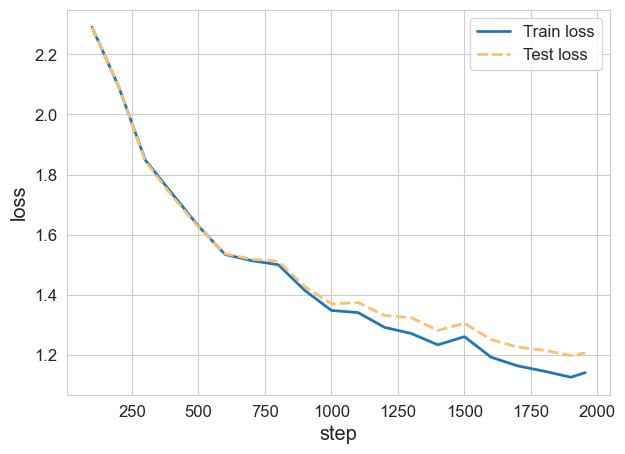

In [16]:
from nnc.plot_tool import draw_scores

train_steps=[x[0] for x in runner.train_loss]
train_losses = [x[1] for x in runner.train_loss]    
if len(runner.test_loss)>0:
    test_steps=[x[0] for x in runner.test_loss]
    test_losses = [x[1] for x in runner.test_loss]        
param_name = 'step'    
metric_name =  'loss' # 'accuracy' #
draw_scores(fig_path,fig_name.format(param_name+'-'+metric_name),
                      train_scores=(train_losses,train_steps),
                      test_scores=(test_losses,test_steps),
                      metric=metric_name,
                      param_name=param_name)

&nbsp;&nbsp;&nbsp; (2) &nbsp; 绘制训练\测试 分类评价分数变化曲线

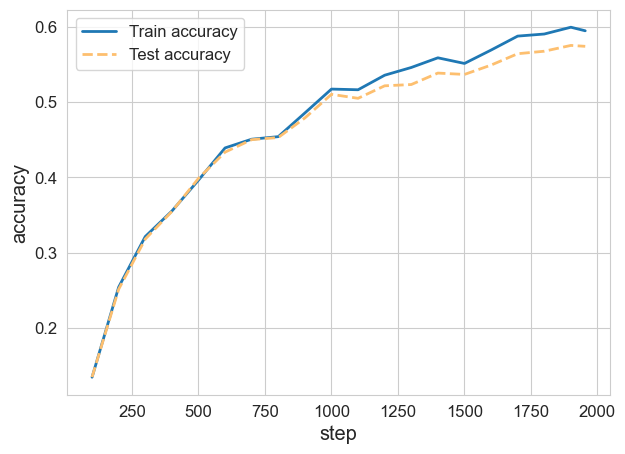

In [17]:
train_steps=[x[0] for x in runner.train_loss]
train_scores = runner.train_scores    
if len(runner.test_loss)>0:
    test_steps=[x[0] for x in runner.test_loss]
    test_scores  = runner.test_scores       
param_name = 'step'    
metric_name =  'accuracy' #  'loss' # 
draw_scores(fig_path,fig_name.format(param_name+'-'+metric_name),
                      train_scores=(train_scores,train_steps),
                      test_scores=(test_scores,test_steps),
                      metric=metric_name,
                      param_name=param_name)

### 6. 加载已经训练好的模型

- 加载模型

In [18]:
dataset_name = 'CIFAR10'   # 数据集名称
net_name = 'cnn_2'  # 网络名称
exam_name = 'ex_1'  # 实验名称
# 模型参数保存路径/名称
model_path = f'./Results/{dataset_name}/{net_name}/{exam_name}'
model_name = 'model_params.pt'   # 在训练过程中已保存的模型参数

# 实例化模型 (新的未经过训练的模型)
model = Model_Net(in_channels=in_channels,num_classes=n_classes)
# 实例化模型
runner = Runner(model,optimizer,loss_func,metric)
# 加载模型参数
runner.load_model(model_dir=model_path,model_name=model_name)

- 对训练好的模型，利用测试集（或新的数据集）进行评价

In [19]:
# 在测试集上对模型进行评价
metric_name =  'accuracy' # 评价方法为分类“正确率”
test_score,test_loss = runner.evaluate(test_loader)
print("[Test] {}/loss: {:.4f}/{:.4f}".format(metric_name,test_score,test_loss))

[Test] accuracy/loss: 0.5738/1.2067


### 7. 模型预测

- 利用已训练好的模型对新数据进行预测

In [20]:
# 这里是选取测试集中的部分样本进行预测
for X,labels in test_loader:
    break
pred_y = torch.argmax(runner.predict(X),dim=1,keepdim=False)
pred_y = pred_y.numpy()

- 预测结果可视化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

The true category is cat and the predicted category is cat. True
The true category is ship and the predicted category is ship. True
The true category is ship and the predicted category is ship. True
The true category is plane and the predicted category is plane. True
The true category is frog and the predicted category is deer. False
The true category is frog and the predicted category is frog. True
The true category is car and the predicted category is dog. False
The true category is frog and the predicted category is deer. False
The true category is cat and the predicted category is dog. False
The true category is car and the predicted category is car. True


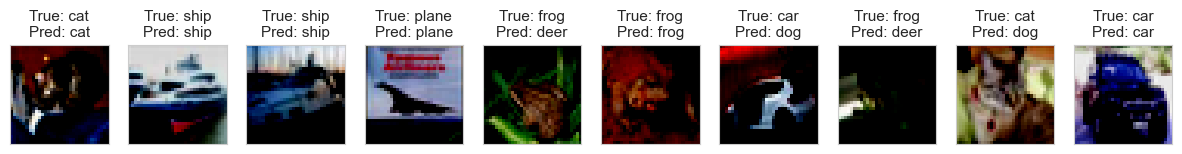

In [21]:
from nnc.plot_tool import show_images

# 获取数据的真实标签和预测标签
trues = get_cifar_labels(labels)
preds = get_cifar_labels(pred_y)

titles = ['True: '+true +'\n' + 'Pred: '+pred for true, pred in zip(trues, preds)]
n = 10           # 显示的图片数目 
# 输出真实类别与预测类别
i = 0
for pred,true in zip(preds,trues):        
    if i < n:
        print(f"The true category is {true} and the predicted category is {pred}. {true==pred}")
    i += 1
# 可视化并保存
fig_name = 'predict-label.pdf'
show_images(X[:n].numpy().transpose(0,2,3,1),1,n,titles=titles[0:n],scale=1.5,fig_dir=fig_path,fig_name=fig_name)
